# Data cleaning section

In [11]:
# Data Wrangling
import numpy as np
import pandas as pd

# Vizualizacao
import seaborn as sns
import matplotlib.pyplot as plt

# To save format
import pickle

In [2]:
df = pd.read_csv('./data/data.csv', sep=",", encoding="ISO-8859-1")

In [3]:
len(df)

541909

## Drop missing NaN cells

These cells are going to be eliminated, for there can't be used or infered any information with these cells, so imputation or interpolation would be erroneous and meaningless.

In [4]:
df.dropna(inplace = True);

In [5]:
len(df)

406829

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## Drop Negative values for 'Quantity' and 'UnitPrice'

In [7]:
len(df.query("Quantity > 0 and UnitPrice > 0"))

397884

In [8]:
df = df.query("Quantity > 0 and UnitPrice > 0")

## Drop duplicated rows

In [9]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [10]:
df = df.drop_duplicates()

## Correction of data types

In [17]:
df['CustomerID'] = df['CustomerID'].astype('int').astype('string')

In [18]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID     string[python]
Country                object
dtype: object

## Boxplot to check outliers after changes

<Axes: >

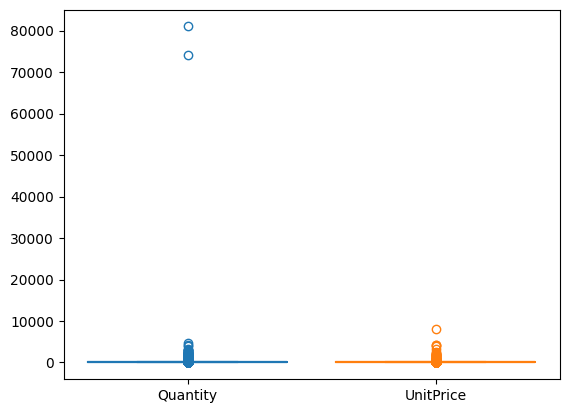

In [19]:
sns.boxplot(data = df[['Quantity', 'UnitPrice']], fill = False)

In [20]:
# Drop distant outliers
df = df.query('Quantity < 10000')
df = df.query('UnitPrice < 5000')

<Axes: >

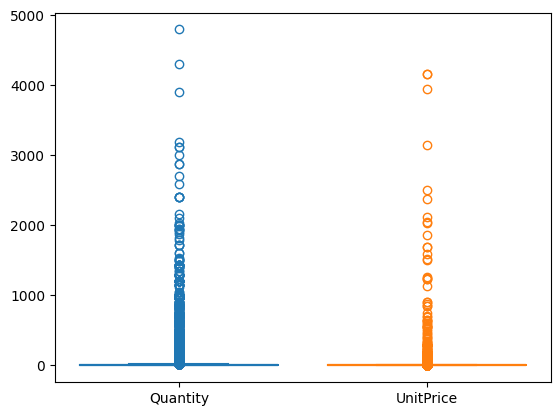

In [21]:
sns.boxplot(data = df[['Quantity', 'UnitPrice']], fill = False)

In [22]:
# Again
df = df.query('Quantity < 3500')
df = df.query('UnitPrice < 2000')

Using cap method

<Axes: >

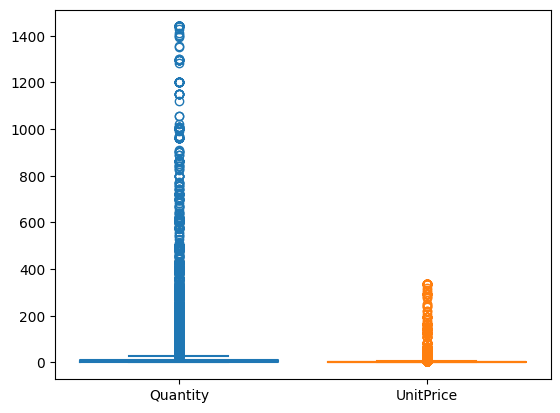

In [26]:
sns.boxplot(data = df[['Quantity', 'UnitPrice']].apply(lambda x: x.clip(upper=x.quantile(.9999))), fill = False)

The remaining outliers are going to be kept, for in sales this can happen due to large sales for large companies, although the vast majority of clients buy smaller amounts of products.

<Axes: >

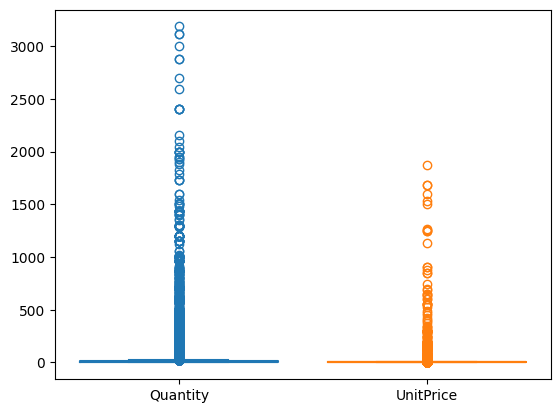

In [27]:
sns.boxplot(data = df[['Quantity', 'UnitPrice']], fill = False)

## Saving clean data as pickle 

In [34]:
df.to_pickle('./data/clean_data.pkl')